In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

params = {'axes.labelsize': 12,
          'font.size': 10,
          'legend.fontsize': 12}

plt.rcParams.update(params)
import warnings
warnings.filterwarnings('ignore')

## EXPLORE DATA AND PRECISE THE OBJECTIVE

Here CPU = cpu_user + cpu_sys + cpu_wait

In [2]:
df = pd.read_csv("./data/cpu_slzq0b_all.csv", sep="|")

In [3]:
df.head()

,datetime,cpu
0,2017-10-19 00:30:05,1.008
1,2017-10-19 01:35:06,0.476
2,2017-10-19 02:05:07,3.988
3,2017-10-19 02:20:08,3.740
4,2017-10-19 02:25:08,3.876


In [18]:
df.isnull().sum()

datetime    0
cpu         0
dtype: int64

## DAILY MEAN METRICS

In [19]:
df.datetime = pd.to_datetime(df.datetime)

In [20]:
df.set_index("datetime", inplace=True)

In [22]:
daily_mean = df.resample("D").mean()

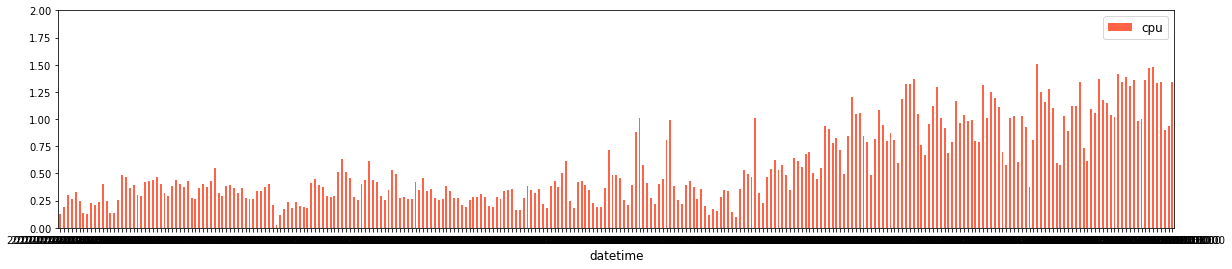

In [27]:
daily_mean.plot(kind='bar', xticks=[], ylim = [0, 2], color="tomato", figsize=(20, 4))
plt.show()

In [28]:
marker = daily_mean[["cpu"]]
marker["cpu"] = 0
marker.loc["2017-09-09"] = 4

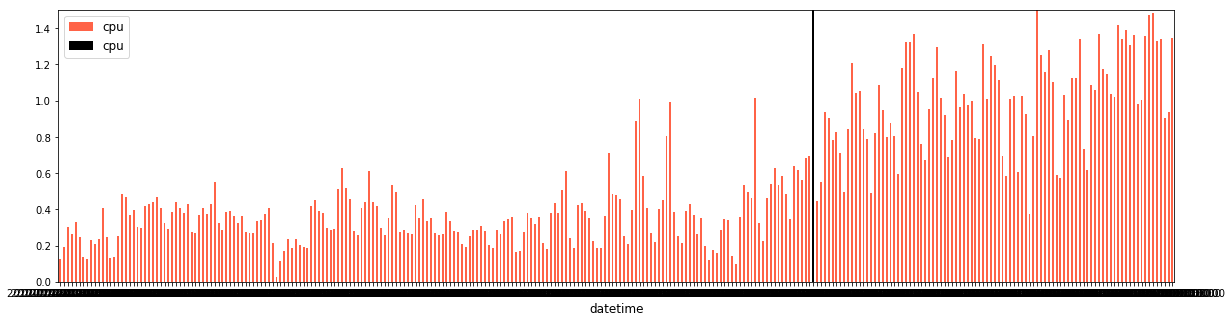

In [30]:
fig, axes = plt.subplots(1, 1, figsize=(20,5))
daily_mean.plot(y = "cpu", kind='bar', ax=axes, xticks=[], ylim = [0, 1.5], color="tomato")
marker.plot(kind='bar', xticks=[], color = "black", ax = axes)

***Conclusion***

In september 2017 (2017/09/09), conditions have changed:
    
    - CPU : from 2 to 4 Go
    - MEM : from 12 Go to 16 Go
   
   ==> Try to only use data from the date 2017/09/09 (2 months of data)

In [31]:
df = df.sort_index()
df = df.loc["2017-09-09":]

## HOURLY MEAN METRICS

        CPU

In [34]:
df = df.resample("h").mean()

In [35]:
df.isnull().sum()

cpu    37
dtype: int64

In [40]:
df = df.reset_index()

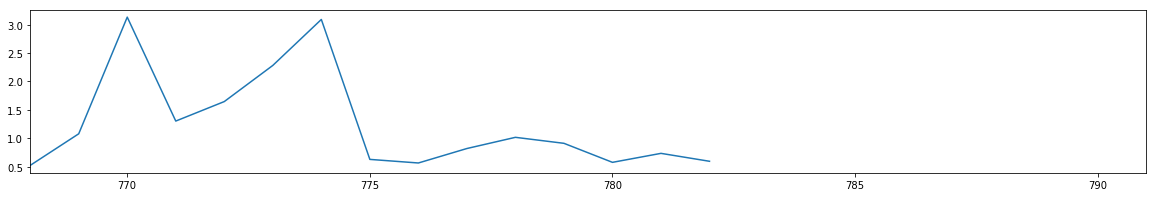

In [45]:
df[(df["datetime"] >= "2017-10-11") & (df["datetime"] < "2017-10-12")].cpu.plot(figsize=(20,3), x="datetime")

#### PLOT DAY OF WEEK METRICS

In [47]:
df.set_index("datetime", inplace=True)

In [48]:
df_monday = df[df.index.dayofweek == 0]
df_thuesday = df[df.index.dayofweek == 1]
df_wed = df[df.index.dayofweek == 2]
df_thur = df[df.index.dayofweek == 3]
df_fri = df[df.index.dayofweek == 4]
df_sat = df[df.index.dayofweek == 5]
df_sun = df[df.index.dayofweek == 6]

In [50]:
month = 11
np.unique(df_sun[df_sun.index.month == month].index.day)

array([ 5, 12, 19, 26])

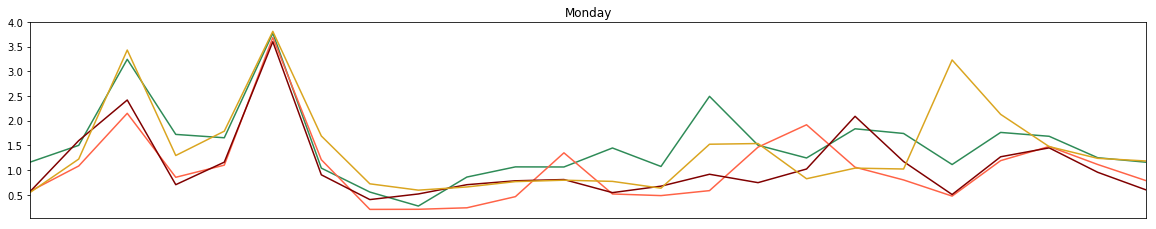

In [51]:
ax = df_monday.loc["2017-" + str(11) + "-" + str(6), "cpu"].plot( use_index = False, color = 'seagreen', xticks = [], figsize=(20, 4))   
df_monday.loc["2017-" + str(11) + "-" + str(13), "cpu"].plot( use_index = False, color = 'tomato', xticks = [], ax=ax)  
df_monday.loc["2017-" + str(11) + "-" + str(20), "cpu"].plot( use_index = False, color = 'maroon', xticks = [], ax=ax) 
df_monday.loc["2017-" + str(11) + "-" + str(27), "cpu"].plot( use_index = False, color = 'goldenrod', xticks = [], ax=ax)
plt.title("Monday")
plt.show()

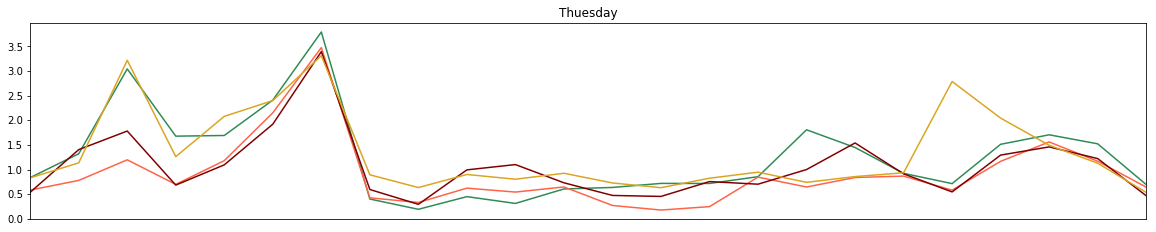

In [52]:
ax = df_thuesday.loc["2017-" + str(11) + "-" + str(7), "cpu"].plot( use_index = False, color = 'seagreen', xticks = [], figsize=(20, 4))   
df_thuesday.loc["2017-" + str(11) + "-" + str(14), "cpu"].plot( use_index = False, color = 'tomato', xticks = [], ax=ax)  
df_thuesday.loc["2017-" + str(11) + "-" + str(21), "cpu"].plot( use_index = False, color = 'maroon', xticks = [], ax=ax) 
df_thuesday.loc["2017-" + str(11) + "-" + str(28), "cpu"].plot( use_index = False, color = 'goldenrod', xticks = [], ax=ax)
plt.title("Thuesday")
plt.show()

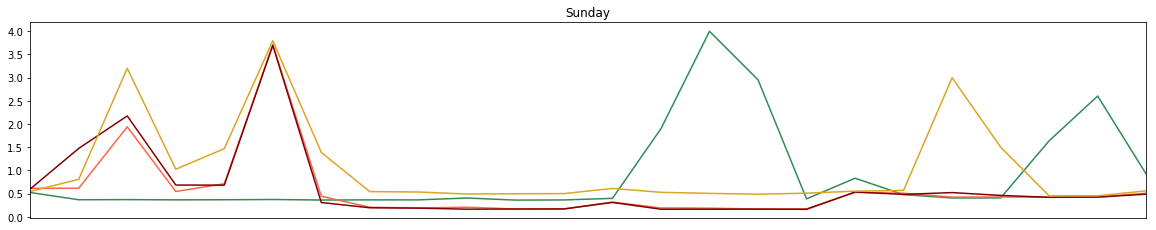

In [53]:
ax = df_sun.loc["2017-" + str(11) + "-" + str(5), "cpu"].plot( use_index = False, color = 'seagreen', xticks = [], figsize=(20, 4))   
df_sun.loc["2017-" + str(11) + "-" + str(12), "cpu"].plot( use_index = False, color = 'tomato', xticks = [], ax=ax)  
df_sun.loc["2017-" + str(11) + "-" + str(19), "cpu"].plot( use_index = False, color = 'maroon', xticks = [], ax=ax) 
df_sun.loc["2017-" + str(11) + "-" + str(26), "cpu"].plot( use_index = False, color = 'goldenrod', xticks = [], ax=ax)
plt.title("Sunday")
plt.show()

### Plot November

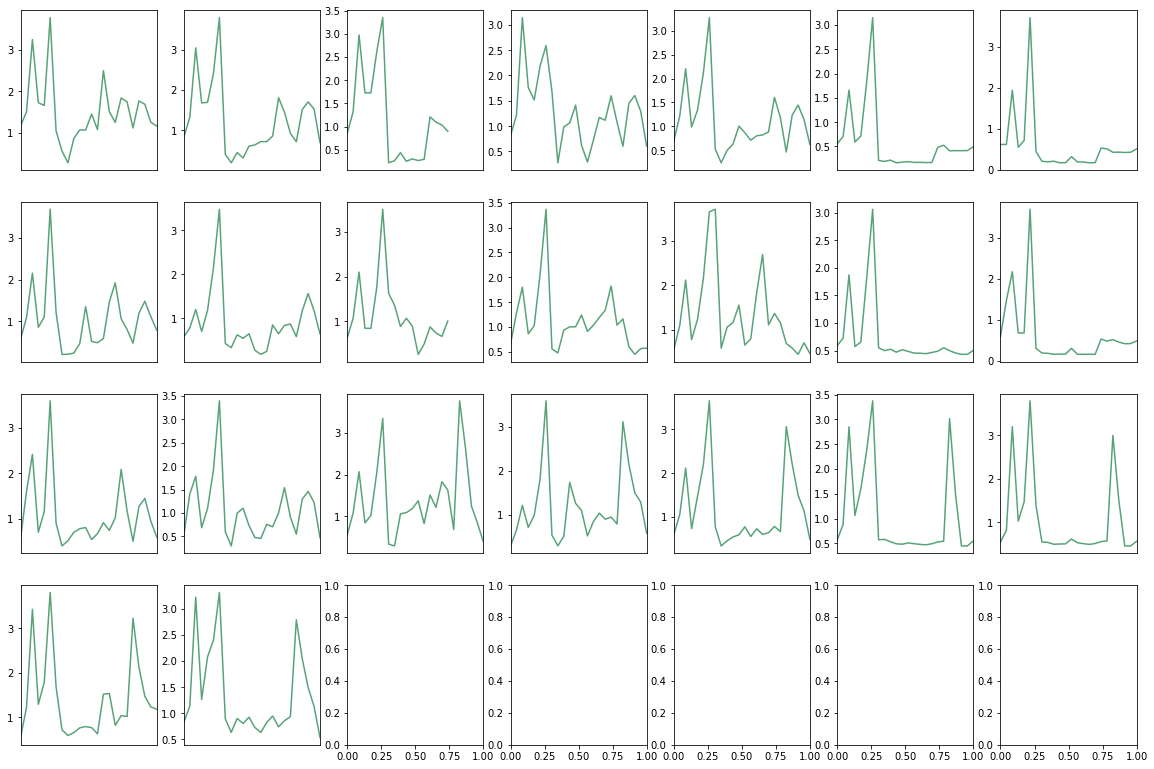

In [54]:
ncol = 7
nrow = 4
fig, axes = plt.subplots(nrow, ncol, figsize=(20, 15))
k=6
for i in range(nrow):
    for j in range(ncol):
        if k == 29:
            break
        df.loc["2017-11-" + str(k), "cpu"].plot( use_index = False, ax=axes[i][j], color = 'seagreen', xticks = [], alpha = 0.8)      
        k +=1
plt.show()

### Plot September

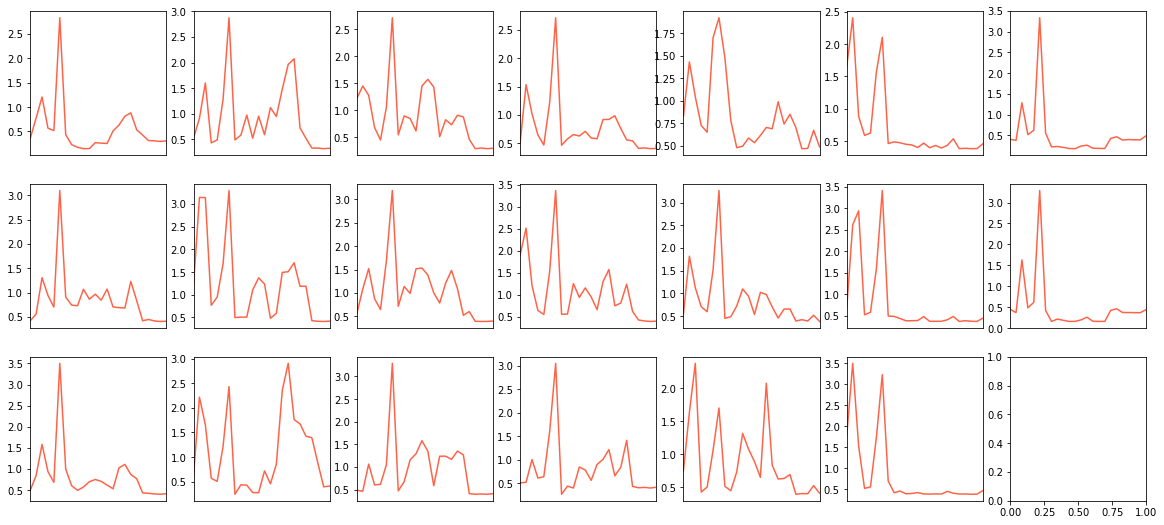

In [55]:
ncol = 7
nrow = 3
fig, axes = plt.subplots(nrow, ncol, figsize=(20, 10))
k=11
for i in range(nrow):
    for j in range(ncol):
        if k == 31:
            break
        df.loc["2017-09-" + str(k), "cpu"].plot( use_index = False, ax=axes[i][j], color = 'tomato', xticks = [])      
        k +=1
plt.show()

### Plot october

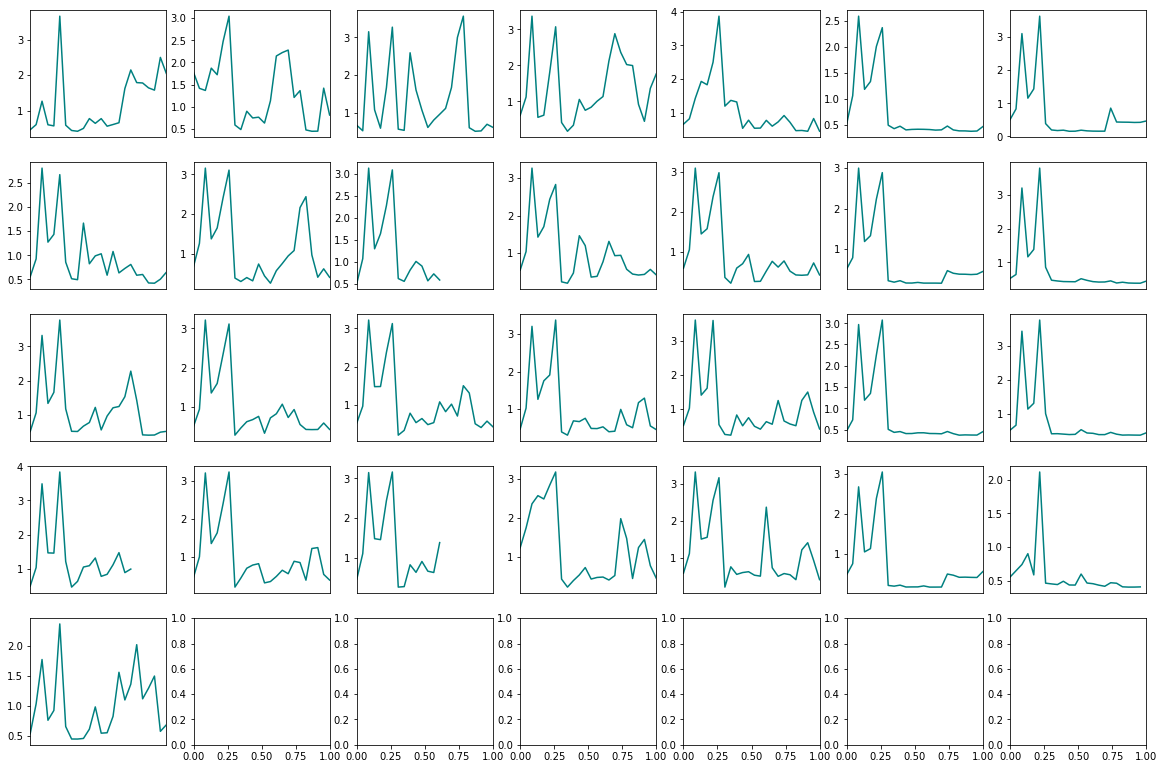

In [56]:
ncol = 7
nrow = 5
fig, axes = plt.subplots(nrow, ncol, figsize=(20, 15))
k=2
for i in range(nrow):
    for j in range(ncol):
        if k == 31:
            break
        df.loc["2017-10-" + str(k), "cpu"].plot( use_index = False, ax=axes[i][j], color = 'teal', xticks = [])      
        k +=1
plt.show()

#### CONCLUSION

    ### In a first step, we can try to predict hourly cpu (cpu = cpu_user + cpu_sys + cpu_wait) for the day after today. We can fill nan values with the mean values of the same week day of the same month